In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mall_customer.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

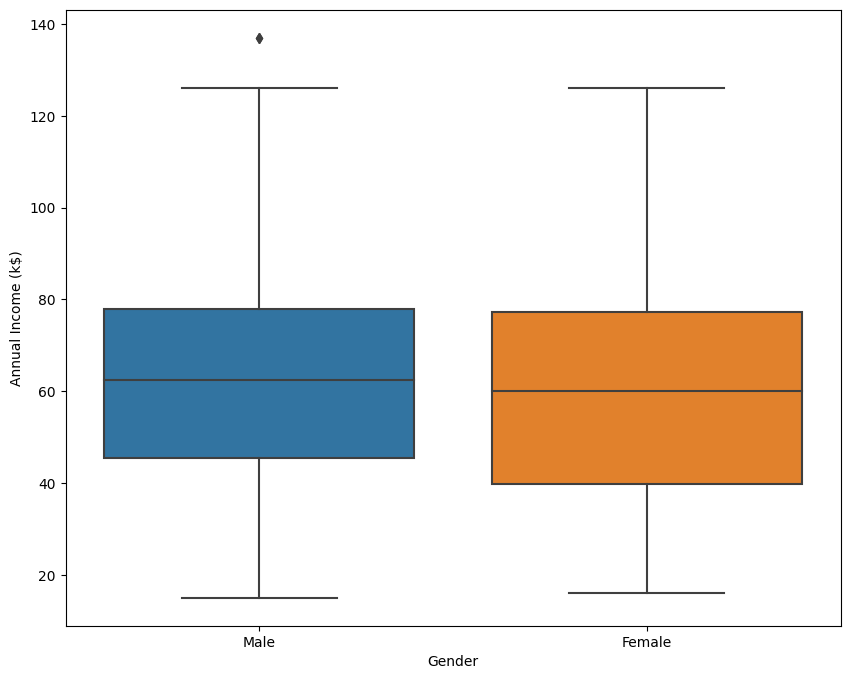

In [4]:
plt.figure(figsize=(10,8))
sns.boxplot(data= df, x= 'Gender', y= 'Annual Income (k$)')

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

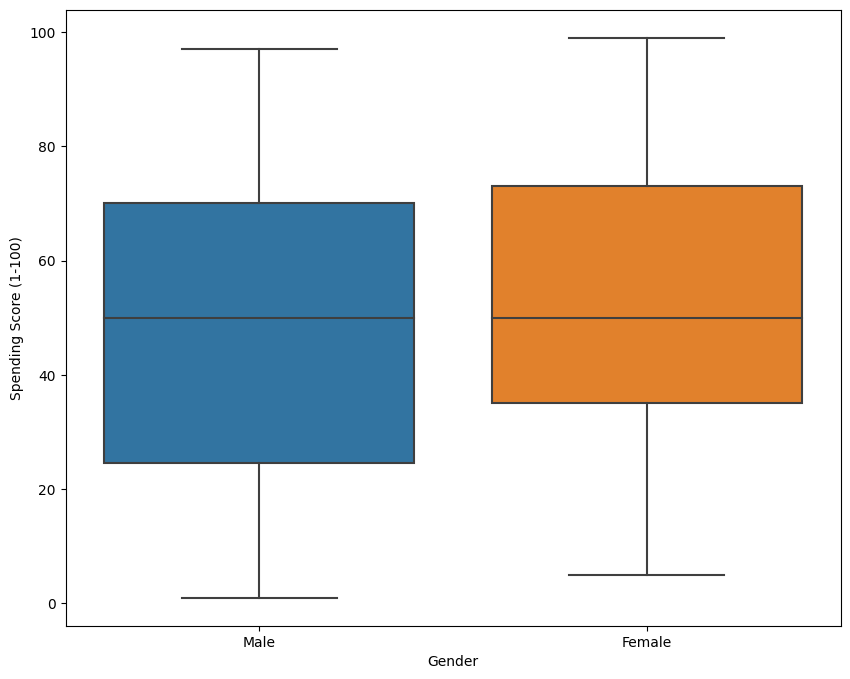

In [5]:
plt.figure(figsize=(10,8))
sns.boxplot(data= df, x= 'Gender', y= 'Spending Score (1-100)')

<Axes: xlabel='Gender', ylabel='Age'>

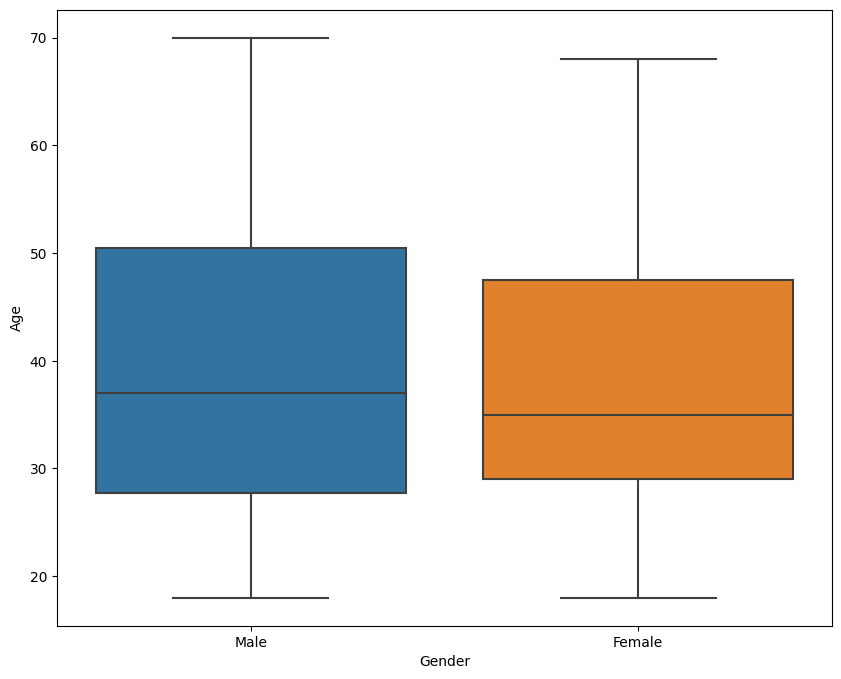

In [6]:
plt.figure(figsize=(10,8))
sns.boxplot(data= df, x= 'Gender', y= 'Age')

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

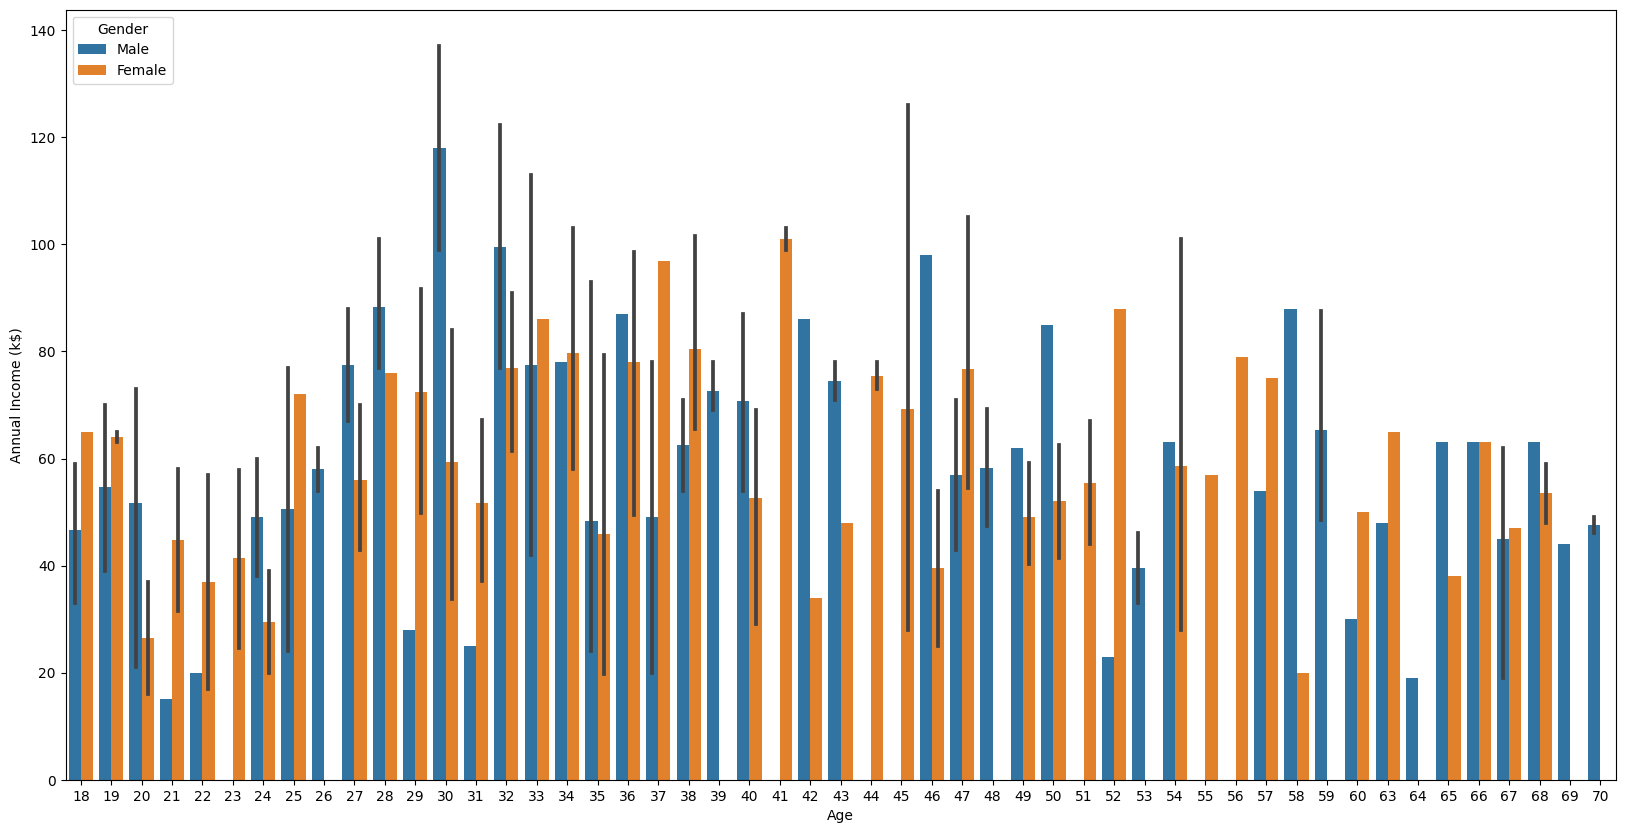

In [7]:
plt.figure(figsize=(20,10))
sns.barplot(data= df, x= 'Age', y= 'Annual Income (k$)', hue= 'Gender')

<Figure size 1000x800 with 0 Axes>

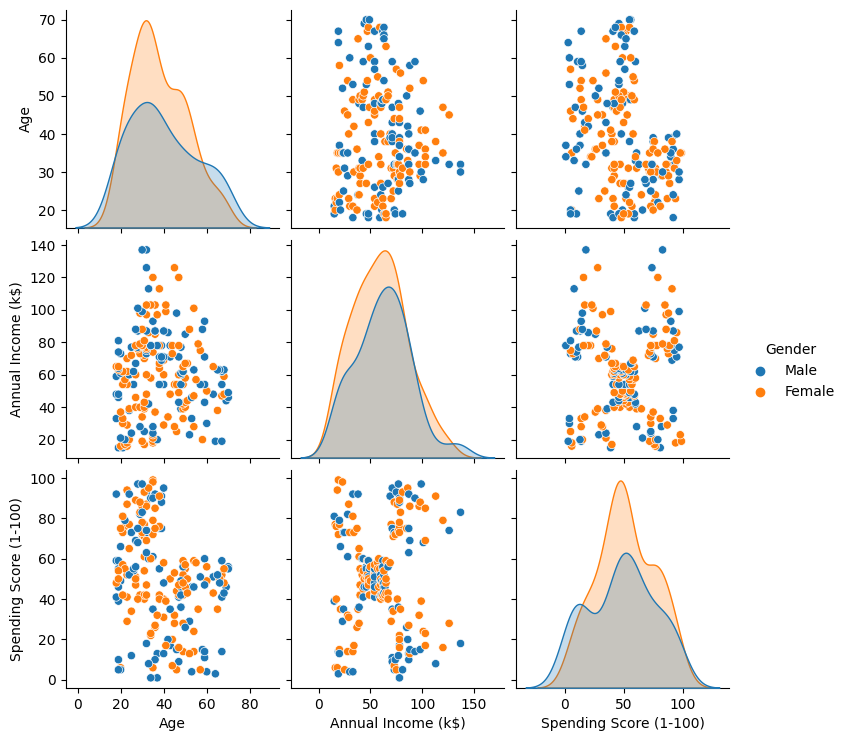

In [8]:
plt.figure(figsize=(10,8))
sns.pairplot(df.iloc[:,1:], hue= 'Gender')

In [9]:
from sklearn.preprocessing import StandardScaler

X = df.iloc[:, 2:]
scaler = StandardScaler()
X = scaler.fit_transform(X)

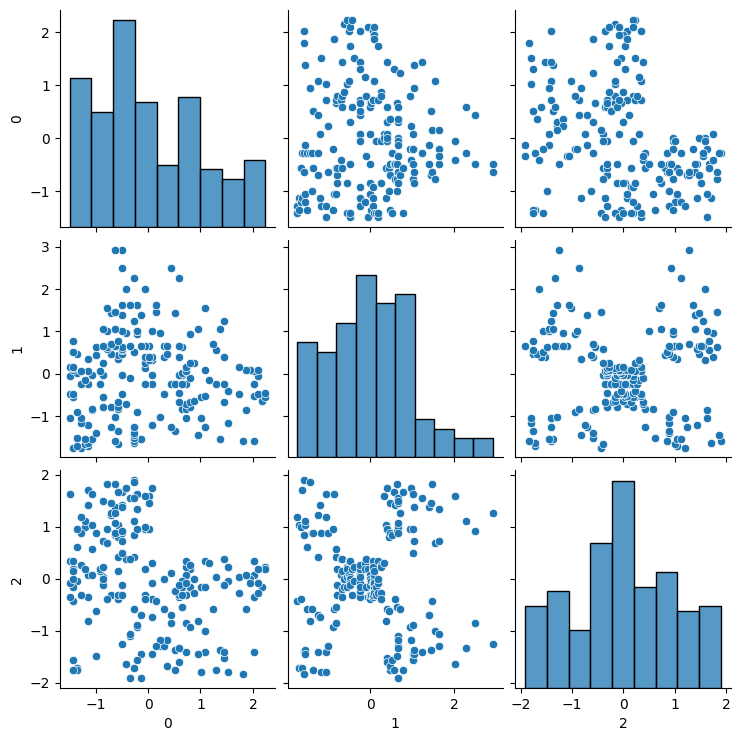

In [10]:
sns.pairplot(pd.DataFrame(X))

In [11]:
gender = df['Gender']
df_scaled = pd.DataFrame(X, columns= ['Age', 'Income', 'Score'])
df_scaled['Gender'] = gender
df_scaled

,Age,Income,Score,Gender
0,-1.424569,-1.738999,-0.434801,Male
1,-1.281035,-1.738999,1.195704,Male
2,-1.352802,-1.700830,-1.715913,Female
3,-1.137502,-1.700830,1.040418,Female
4,-0.563369,-1.662660,-0.395980,Female
...,...,...,...,...
195,-0.276302,2.268791,1.118061,Female
196,0.441365,2.497807,-0.861839,Female
197,-0.491602,2.497807,0.923953,Male
198,-0.491602,2.917671,-1.250054,Male


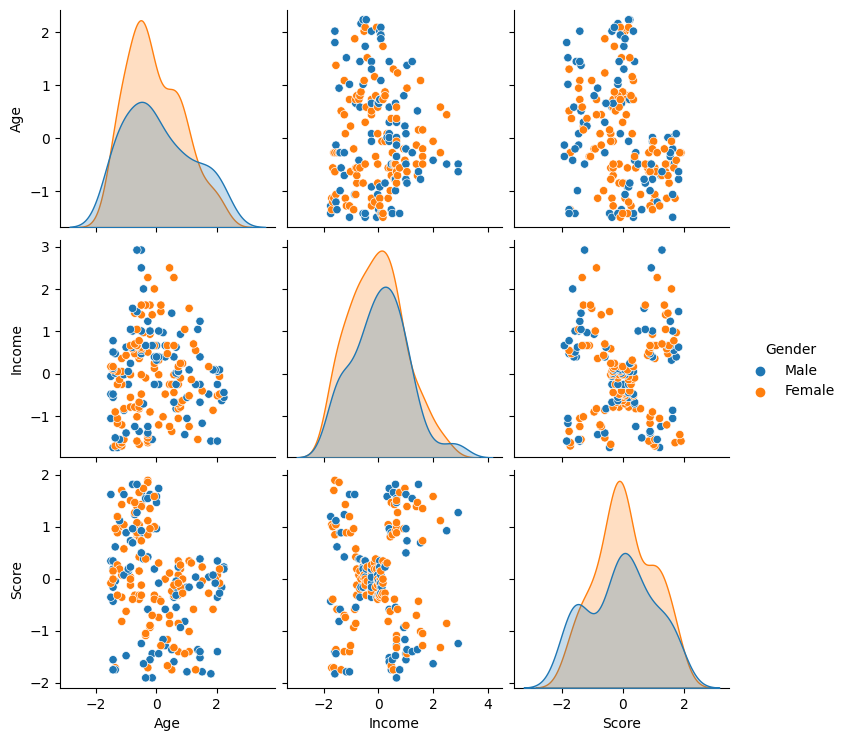

In [12]:
sns.pairplot(df_scaled, hue= 'Gender')

In [13]:
from sklearn.cluster import KMeans
X = df_scaled[['Age','Score']].to_numpy()

kmeans = KMeans(n_clusters=2, random_state= 42)
kmeans.fit(X)

C:\Users\mohanad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [14]:
kmeans.cluster_centers_, kmeans.inertia_

(array([[ 0.70892251, -0.69939115],
        [-0.75277339,  0.74265245]]),
 189.38749033992428)

In [15]:
labels = kmeans.labels_

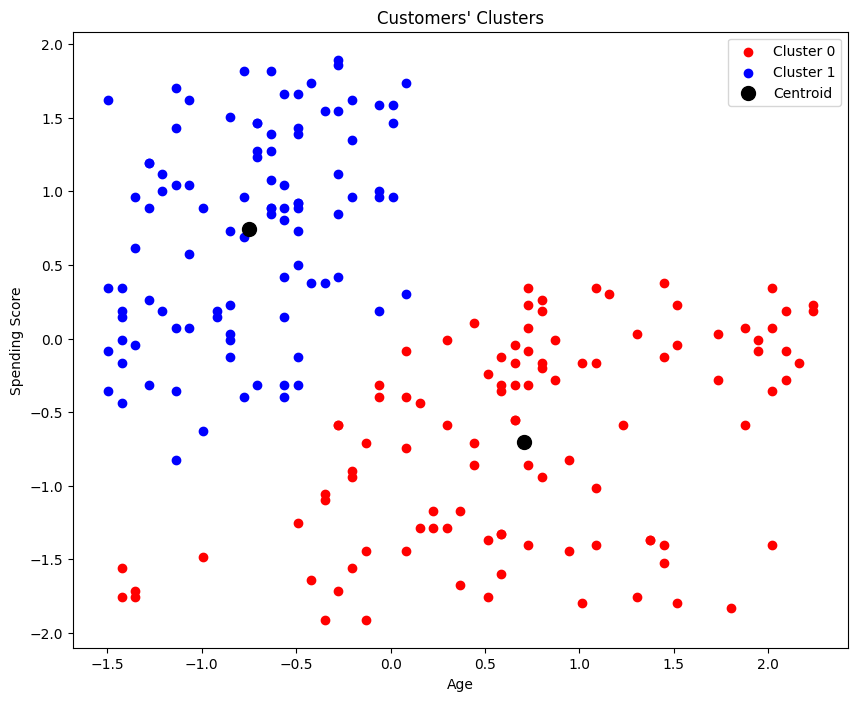

In [16]:
clust0 = labels == 0
clust1 = labels == 1
plt.figure(figsize=(10,8))
plt.scatter(X[clust0, 0], X[clust0, 1], c= 'red', label = 'Cluster 0')
plt.scatter(X[clust1, 0], X[clust1, 1], c= 'blue', label = 'Cluster 1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c= 'black', s= 100, label = 'Centroid')
plt.title('Customers\' Clusters')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

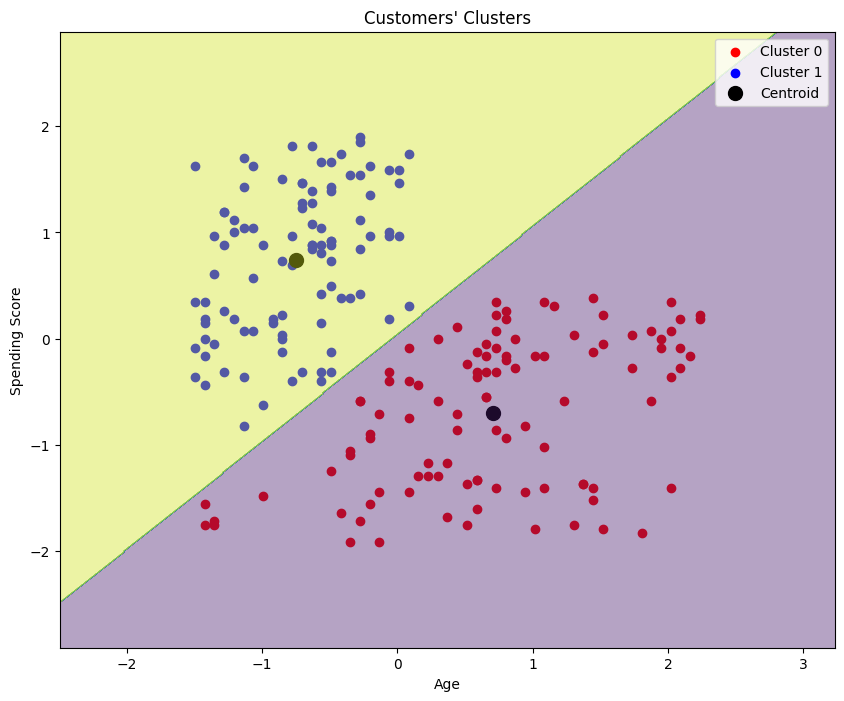

In [17]:
clust0 = labels == 0
clust1 = labels == 1
plt.figure(figsize=(10,8))
plt.scatter(X[clust0, 0], X[clust0, 1], c= 'red', label = 'Cluster 0')
plt.scatter(X[clust1, 0], X[clust1, 1], c= 'blue', label = 'Cluster 1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c= 'black', s= 100, label = 'Centroid')
plt.title('Customers\' Clusters')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
x_min, x_max ,y_min, y_max = X[:, 0].min()-1, X[:, 0].max()+1, X[:, 1].min()-1, X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))
region_points = np.concatenate((xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)), axis= 1)
Z = kmeans.predict(region_points)
Z = Z.reshape(xx.shape)
plt.contourf(xx,yy, Z, alpha= 0.4)

In [18]:
def plot_K_clusters_decision_boundary(df, cols, k):
    kmean = KMeans(n_clusters= k, n_init=10)
    X = df[cols].to_numpy()
    kmean.fit(X)
    labels = kmean.labels_
    plt.figure(figsize=(10,8))
    for idx in range(k):
        cluster_i = labels == idx
        print(f'Cluster {idx} : {cluster_i.sum()} Customers')
        plt.scatter(X[cluster_i, 0], X[cluster_i, 1], label = f'Cluster {idx}')
    plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], c= 'black', s= 100, label = 'Centroid')
    plt.title('Customers\' Clusters')
    plt.xlabel(cols[0])
    plt.ylabel(cols[1])
    plt.legend()
    x_min, x_max ,y_min, y_max = X[:, 0].min()-1, X[:, 0].max()+1, X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))
    region_points = np.concatenate((xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)), axis= 1)
    Z = kmean.predict(region_points)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha= 0.2)

Cluster 0 : 37 Customers
Cluster 1 : 57 Customers
Cluster 2 : 38 Customers
Cluster 3 : 23 Customers
Cluster 4 : 20 Customers
Cluster 5 : 25 Customers


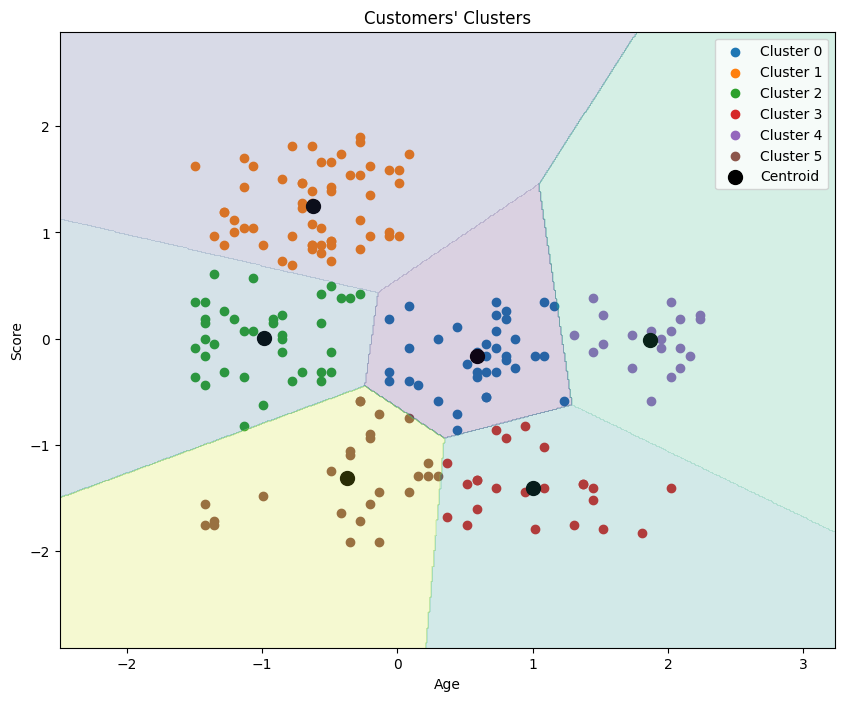

In [19]:
plot_K_clusters_decision_boundary(df_scaled, ['Age', 'Score'], 6)

In [20]:
from sklearn.metrics import silhouette_score

inertia = []
sil_score = []
n_cluster = []
max_k = 15
for k in range(2, max_k):
    kmean = KMeans(n_clusters= k, n_init=10)
    kmean.fit(X)
    inertia.append(kmean.inertia_)
    s_score = silhouette_score(X, kmean.labels_)
    sil_score.append(s_score)
    n_cluster.append(k)

In [21]:
pd.DataFrame({'inertia': inertia, 'silhouette score': sil_score, 'number of clusters': n_cluster})

,inertia,silhouette score,number of clusters
0,189.387490,0.472127,2
1,124.326286,0.439530,3
2,89.765217,0.438386,4
3,71.093641,0.423691,5
4,53.128438,0.456628,6
5,45.920391,0.408008,7
6,39.822701,0.400960,8
7,33.774247,0.429287,9
8,28.927275,0.438899,10
9,25.422985,0.438953,11


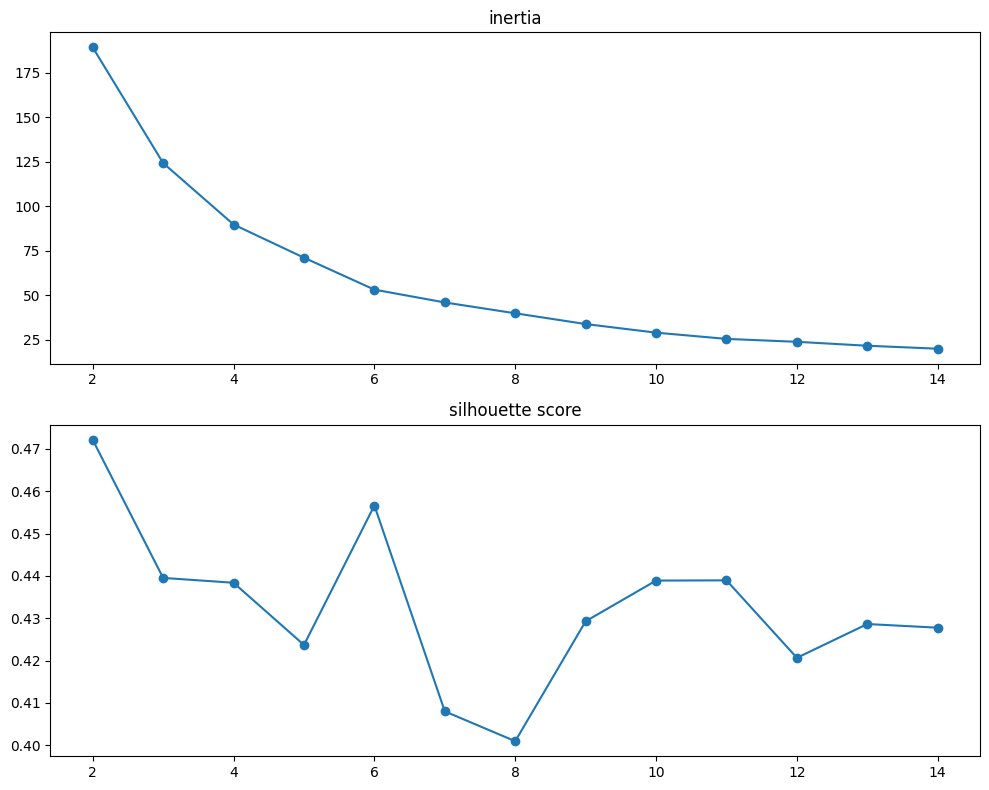

In [22]:
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)
plt.title('inertia')
plt.plot(np.arange(2,max_k), inertia, 'o-')
plt.subplot(2, 1 ,2)
plt.title('silhouette score')
plt.plot(np.arange(2,max_k), sil_score, 'o-')
plt.tight_layout()
plt.show()

In [23]:
def plot_inertia_silhouette(df, cols, max_k):
    inertia = []
    sil_score = []
    n_cluster = []
    X = df[cols].to_numpy()
    for k in range(2, max_k):
        kmean = KMeans(n_clusters= k, n_init=10)
        kmean.fit(X)
        inertia.append(kmean.inertia_)
        s_score = silhouette_score(X, kmean.labels_)
        sil_score.append(s_score)
        n_cluster.append(k)
    plt.figure(figsize=(10,8))
    plt.subplot(2, 1, 1)
    plt.title('inertia')
    plt.plot(np.arange(2,max_k), inertia, 'o-')
    plt.subplot(2, 1 ,2)
    plt.title('silhouette score')
    plt.plot(np.arange(2,max_k), sil_score, 'o-')
    plt.tight_layout()
    plt.show()

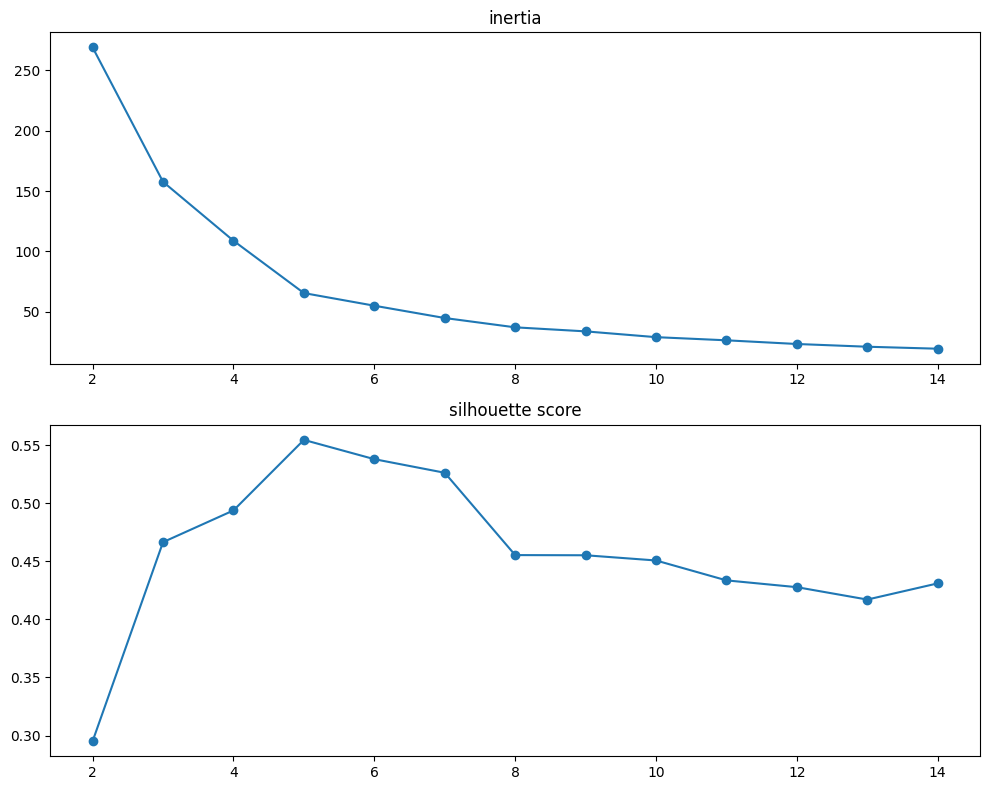

In [24]:
plot_inertia_silhouette(df_scaled, ['Income', 'Score'], 15)

Cluster 0 : 81 Customers
Cluster 1 : 39 Customers
Cluster 2 : 22 Customers
Cluster 3 : 35 Customers
Cluster 4 : 23 Customers


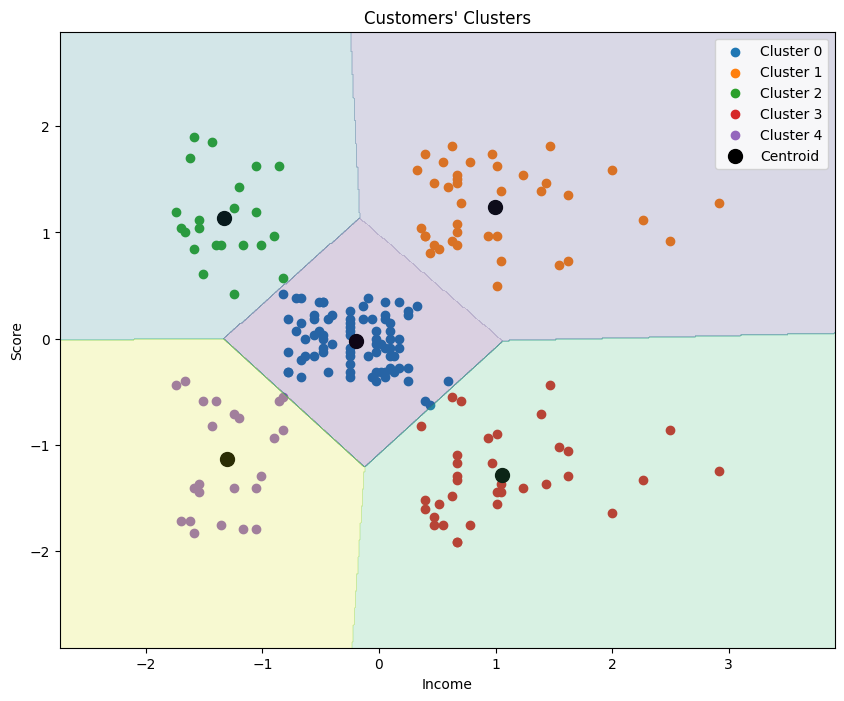

In [25]:
plot_K_clusters_decision_boundary(df_scaled, ['Income', 'Score'], k=5)

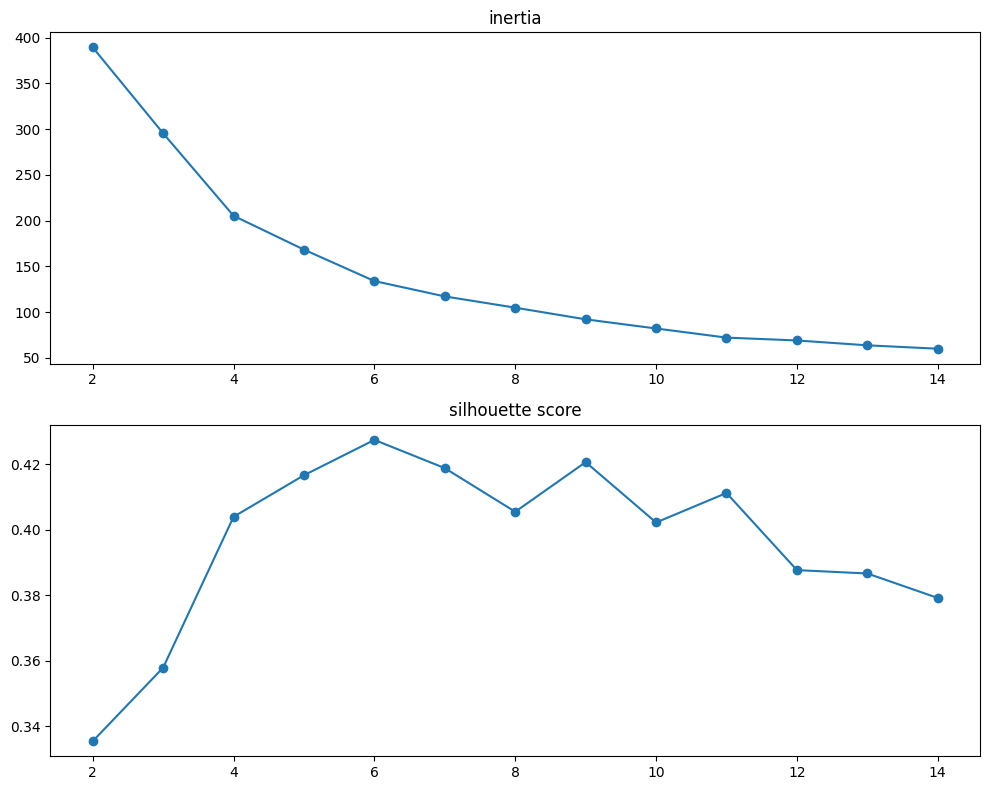

In [26]:
plot_inertia_silhouette(df_scaled, ['Age', 'Income', 'Score'], 15)

In [44]:
import plotly as py
import plotly.graph_objects as go

kmean = KMeans(n_clusters= 6, n_init=10)
X = df_scaled[['Age', 'Score','Income']].to_numpy()
kmean.fit(X)
labels = kmean.labels_

labels = kmean.labels_

In [49]:
df_scaled['clusters'] = labels
df_scaled

,Age,Income,Score,Gender,clusters
0,-1.424569,-1.738999,-0.434801,Male,4
1,-1.281035,-1.738999,1.195704,Male,4
2,-1.352802,-1.700830,-1.715913,Female,5
3,-1.137502,-1.700830,1.040418,Female,4
4,-0.563369,-1.662660,-0.395980,Female,5
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,Female,3
196,0.441365,2.497807,-0.861839,Female,0
197,-0.491602,2.497807,0.923953,Male,3
198,-0.491602,2.917671,-1.250054,Male,0


In [71]:
trace = go.Scatter3d(x = df_scaled['Age'], y = df_scaled['Score'], z = df_scaled['Income'], mode= 'markers', marker=dict(color = df_scaled['clusters']))
data = [trace]
layout = go.Layout(title= '3D Customer Clusters', scene= {'xaxis': {'title': 'Age'},'yaxis': {'title': 'score'},'zaxis': {'title': 'income'}}, height=800, width=1000)
fig = go.Figure(data= data, layout= layout)
py.offline.iplot(fig)

In [75]:
def plot_3D_clusters(df, cols, k, height=800, width= 1000):
    kmean = KMeans(n_clusters= k, n_init=10)
    X = df[cols].to_numpy()
    kmean.fit(X)
    trace = go.Scatter3d(x = df_scaled[cols[0]], y = df_scaled[cols[1]], z = df_scaled[cols[2]], mode= 'markers', marker={'color': kmean.labels_})
    data = [trace]
    layout = go.Layout(title= '3D Customer Clusters', scene= {'xaxis': {'title': cols[0]}, 'yaxis': {'title': cols[1]}, 'zaxis': {'title': cols[2]}}, 
                    height = height, width = width)
    fig = go.Figure(data= data, layout= layout)
    py.offline.iplot(fig)

In [76]:
plot_3D_clusters(df_scaled, ['Age', 'Income', 'Score'], 6)